# 1 - Business Problem
___Salary_hike -> Build a prediction model for Salary_hike___

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("C:\\Users\\Anks\\Desktop\\data science assingment\\Salary_Data (2).csv")



In [4]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Scatter Plot

In [5]:
x = df['YearsExperience']
y = df['Salary']

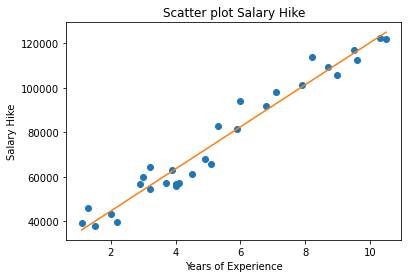

In [6]:
b, m = polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Scatter plot Salary Hike')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Hike')
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

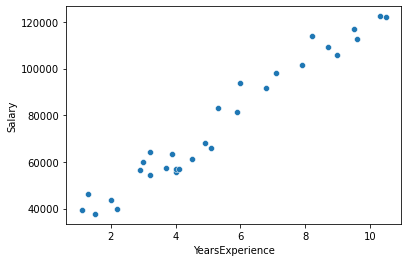

In [31]:
import seaborn as sns
sns.scatterplot(x=df.YearsExperience, y=df.Salary)

# Correlation Analysis

In [32]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# 3 - Regression Model

In [34]:
x = np.array(df["YearsExperience"]).reshape(-1,1)
print("Dimension : ",x.ndim)
print("Shape : ",x.shape)

Dimension :  2
Shape :  (30, 1)


In [36]:
y = np.array(df["Salary"]).reshape(-1,1)
print("Dimension : ",y.ndim)
print("Shape : ",y.shape)

Dimension :  2
Shape :  (30, 1)


In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [40]:
print("Length of X_Train : ",len(x_train))
print("Length of Y_Train : ",len(y_train))
print("Length of X_Test : ",len(x_test))
print("Length of Y_Test : ",len(y_test))


Length of X_Train :  24
Length of Y_Train :  24
Length of X_Test :  6
Length of Y_Test :  6


In [41]:
x_test

array([[5.9],
       [1.1],
       [5.1],
       [4.9],
       [4.5],
       [9.6]])

In [42]:
y_test

array([[ 81363.],
       [ 39343.],
       [ 66029.],
       [ 67938.],
       [ 61111.],
       [112635.]])

In [43]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [44]:
model.score(x_test,y_test)

0.9326565242387084

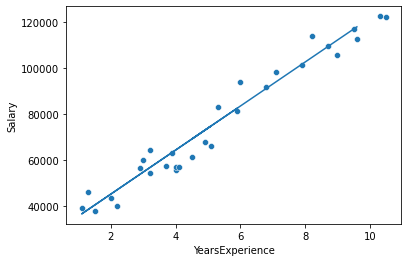

In [46]:
sns.scatterplot(x=df.YearsExperience, y=df.Salary)
plt.plot(x_test,model.predict(x_test))
plt.show()

In [47]:
model.coef_

array([[9552.35919045]])

In [48]:
model.intercept_

array([26087.63816104])

In [49]:
y_predict = np.round(model.predict(x_test),2)
y_predict[0:,0]


array([ 82446.56,  36595.23,  74804.67,  72894.2 ,  69073.25, 117790.29])

In [50]:
x_test[0:,0]

array([5.9, 1.1, 5.1, 4.9, 4.5, 9.6])

In [51]:
y_test[0:,0]

array([ 81363.,  39343.,  66029.,  67938.,  61111., 112635.])

In [53]:
data_1 = {"Test_YearsExperience" : x_test[0:,0], "Actual_Salary" : y_test[0:,0], "Predicted_Salary" : y_predict[0:,0]}
data_1 = pd.DataFrame(data_1)
data_1.to_csv("C:\\Users\\Anks\\Desktop\\data science assingment\\Salary_Data (2).csv") 
data_1.head()

,Test_YearsExperience,Actual_Salary,Predicted_Salary
0,5.9,81363.0,82446.56
1,1.1,39343.0,36595.23
2,5.1,66029.0,74804.67
3,4.9,67938.0,72894.20
4,4.5,61111.0,69073.25


In [54]:
import statsmodels.formula.api as smf

In [56]:
linear_model = smf.ols("y~x", data=df).fit()

In [57]:
linear_model.params

Intercept    25792.200199
x             9449.962321
dtype: float64

In [58]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        17:55:50   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1 - No transformation

In [59]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)


In [60]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    2.56e-24
Time:                        17:57:03   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2 - Log Transformation of X

In [61]:
x_log = np.log(df['YearsExperience'])


In [62]:
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)


In [63]:

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1338.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    8.06e-26
Time:                        17:57:06   Log-Likelihood:                         -323.70
No. Observations:                  30   AIC:                                      649.4
Df Residuals:                      29   BIC:                                      650.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  4.909e+04   1341.796     36.583      0.000    4.63e+04    5.18e+04
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.950
Skew:                           1.106   Prob(JB):                       0.0114
Kurtosis:                       4.507   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3 - Log Transformation of Y

In [64]:
y_log = np.log(df['Salary'])


In [65]:

model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)


In [66]:

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              122.8
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    6.09e-12
Time:                        17:57:08   Log-Likelihood:                         -90.160
No. Observations:                  30   AIC:                                      182.3
Df Residuals:                      29   BIC:                                      183.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6755      0.151     11.083      0.000       1.366       1.985
==============================================================================
Omnibus:                        3.609   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.045
Skew:                          -0.389   Prob(JB):                        0.360
Kurtosis:                       1.985   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4 - Log Transformation of X & Y

In [67]:
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)


In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    8.60e-15
Time:                        17:57:11   Log-Likelihood:                         -83.410
No. Observations:                  30   AIC:                                      168.8
Df Residuals:                      29   BIC:                                      170.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5 - Sq Root Transformation of X

In [69]:
x_sqrt = np.sqrt(df['YearsExperience'])


In [70]:
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [71]:

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2697.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    3.62e-30
Time:                        17:57:13   Log-Likelihood:                         -313.35
No. Observations:                  30   AIC:                                      628.7
Df Residuals:                      29   BIC:                                      630.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   3.48e+04    670.056     51.932      0.000    3.34e+04    3.62e+04
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.849
Skew:                          -0.040   Prob(JB):                        0.397
Kurtosis:                       1.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6 - Square Root Transformation of Y

In [72]:
y_sqrt = np.sqrt(df['Salary'])


In [73]:
model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              278.1
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    2.12e-16
Time:                        17:57:16   Log-Likelihood:                         -175.75
No. Observations:                  30   AIC:                                      353.5
Df Residuals:                      29   BIC:                                      354.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            43.7142      2.621     16.676      0.000      38.353      49.076
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.859
Skew:                          -0.445   Prob(JB):                        0.395
Kurtosis:                       2.167   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7 - Square Root Transformation of X & Y



In [75]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)



In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    2.81e-29
Time:                        17:57:19   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4 - Output Interpretation
We will use Model 5 as it has the best R square value

1 - p-value < 0.01
Thus the model is accepted

2 - coefficient == 3.48e+04 Thus if the value of years of experience is increased by 1, the predicted value of Salary hike will increase by 3.48e+04

3 - Adj. R-sqared == 0.989
Thus the model explains 98.9% of the variance in dependent variable